In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [69]:
df = pd.read_csv("data/Telco-Customer-Churn.csv")
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [70]:
df.drop("customerID", axis = 1, inplace=True)

In [71]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [72]:
## Total charges column contains non-numeric data

df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')
df.TotalCharges = df.TotalCharges.fillna(0)

In [73]:
# lowercasing column names and string column values

df.columns = df.columns.str.lower().str.replace(" ", "_")

string_columns = list(df.dtypes[df.dtypes == "object"].index)
for col in string_columns:
    df[col] = df[col].str.lower().str.replace(" ", "_")


In [74]:
df.dtypes

gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges        float64
churn                object
dtype: object

In [75]:
df.churn.value_counts()

no     5174
yes    1869
Name: churn, dtype: int64

In [76]:
# Converting churn categories to 0 and 1
df.churn = (df.churn == "yes").astype(int)

In [77]:
df.churn.value_counts()

0    5174
1    1869
Name: churn, dtype: int64

In [78]:
df.seniorcitizen = df.seniorcitizen.astype("object")

In [79]:
# Train test and val split
from sklearn.model_selection import train_test_split

df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_train_full, test_size=0.33, random_state=11)

y_train = df_train.churn.values
y_val = df_val.churn.values

del df_train["churn"]
del df_val["churn"]

In [80]:
# EDA
df_train.isnull().sum()

gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
dtype: int64

In [81]:
# distribution of the target variable

df_train_full.churn.value_counts()

0    4113
1    1521
Name: churn, dtype: int64

In [82]:
# churn rate

df_train_full.churn.value_counts()[1]/len(df_train_full.churn)

0.26996805111821087

In [83]:
df_train_full.churn.mean()

0.26996805111821087

In [84]:
categorical = list(df_train_full.dtypes[df_train_full.dtypes == "object"].index)
numerical = list(df_train_full.dtypes[(df_train_full.dtypes == "int64")|(df_train_full.dtypes == "float64")].index)
print("categorical: ", categorical)
print("numerical: ", numerical)

categorical:  ['gender', 'seniorcitizen', 'partner', 'dependents', 'phoneservice', 'multiplelines', 'internetservice', 'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod']
numerical:  ['tenure', 'monthlycharges', 'totalcharges']


In [85]:
df_train_full[categorical].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

### 3.14 Feature Importance

In [86]:
# Gender
df_train_full.groupby("gender")["churn"].mean().round(3)

gender
female    0.277
male      0.263
Name: churn, dtype: float64

In [87]:
# Partner
df_train_full.groupby("partner")["churn"].mean().round(3)

partner
no     0.330
yes    0.205
Name: churn, dtype: float64

### Risk Ratio

In [88]:
df_train_full.churn.mean()

0.26996805111821087

In [89]:
# Female risk rate
27.7/26.99

1.026306039273805

In [90]:
df_train_full.groupby("gender")['churn'].agg(["mean"])

,mean
gender,
female,0.276824
male,0.263214


In [91]:
global_mean = df_train_full.churn.mean()

for col in categorical:
    df_group = df_train_full.groupby(col)['churn'].agg(["mean"])
    df_group["diff"] = df_group["mean"] - global_mean
    df_group["rate"] = df_group["mean"] / global_mean
    print(df_group)
    

            mean      diff      rate
gender                              
female  0.276824  0.006856  1.025396
male    0.263214 -0.006755  0.974980
                   mean      diff      rate
seniorcitizen                              
0              0.242270 -0.027698  0.897403
1              0.413377  0.143409  1.531208
             mean      diff      rate
partner                              
no       0.329809  0.059841  1.221659
yes      0.205033 -0.064935  0.759472
                mean      diff      rate
dependents                              
no          0.313760  0.043792  1.162212
yes         0.165666 -0.104302  0.613651
                  mean      diff      rate
phoneservice                              
no            0.241316 -0.028652  0.893870
yes           0.273049  0.003081  1.011412
                      mean      diff      rate
multiplelines                                 
no                0.257407 -0.012561  0.953474
no_phone_service  0.241316 -0.028652  0.893870


### Mutual Information

In [92]:
from sklearn.metrics import mutual_info_score

def calculate_mi(series):
    return mutual_info_score(series, df_train_full.churn)

df_mi = df_train_full[categorical].apply(calculate_mi)
df_mi = df_mi.sort_values(ascending=False).to_frame(name="MI")
df_mi

,MI
contract,0.098320
onlinesecurity,0.063085
techsupport,0.061032
internetservice,0.055868
onlinebackup,0.046923
deviceprotection,0.043453
paymentmethod,0.043210
streamingtv,0.031853
streamingmovies,0.031581
paperlessbilling,0.017589


In [93]:
# Correlation
df_train_full[numerical].corrwith(df_train_full['churn'])

tenure           -0.351885
monthlycharges    0.196805
totalcharges     -0.196353
dtype: float64

### 3.2 Feature engineering

In [94]:
train_dict = df_train[categorical + numerical].to_dict(orient = "records")
train_dict

[{'gender': 'male',
  'seniorcitizen': 0,
  'partner': 'yes',
  'dependents': 'no',
  'phoneservice': 'yes',
  'multiplelines': 'no',
  'internetservice': 'dsl',
  'onlinesecurity': 'yes',
  'onlinebackup': 'yes',
  'deviceprotection': 'yes',
  'techsupport': 'yes',
  'streamingtv': 'yes',
  'streamingmovies': 'yes',
  'contract': 'two_year',
  'paperlessbilling': 'yes',
  'paymentmethod': 'bank_transfer_(automatic)',
  'tenure': 71,
  'monthlycharges': 86.1,
  'totalcharges': 6045.9},
 {'gender': 'female',
  'seniorcitizen': 1,
  'partner': 'yes',
  'dependents': 'no',
  'phoneservice': 'yes',
  'multiplelines': 'yes',
  'internetservice': 'fiber_optic',
  'onlinesecurity': 'no',
  'onlinebackup': 'no',
  'deviceprotection': 'yes',
  'techsupport': 'no',
  'streamingtv': 'yes',
  'streamingmovies': 'yes',
  'contract': 'one_year',
  'paperlessbilling': 'yes',
  'paymentmethod': 'credit_card_(automatic)',
  'tenure': 60,
  'monthlycharges': 100.5,
  'totalcharges': 6029.0},
 {'gender':

In [95]:
from sklearn.feature_extraction import DictVectorizer

dv = DictVectorizer(sparse = False)
dv.fit(train_dict)

x_train = dv.transform(train_dict)
x_train[0]

array([0.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00,
       1.0000e+00, 0.0000e+00, 0.0000e+00, 8.6100e+01, 1.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00,
       0.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 7.1000e+01, 6.0459e+03])

In [96]:
dv.get_feature_names()

d:\Miniconda\envs\datascience\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['contract=month-to-month',
 'contract=one_year',
 'contract=two_year',
 'dependents=no',
 'dependents=yes',
 'deviceprotection=no',
 'deviceprotection=no_internet_service',
 'deviceprotection=yes',
 'gender=female',
 'gender=male',
 'internetservice=dsl',
 'internetservice=fiber_optic',
 'internetservice=no',
 'monthlycharges',
 'multiplelines=no',
 'multiplelines=no_phone_service',
 'multiplelines=yes',
 'onlinebackup=no',
 'onlinebackup=no_internet_service',
 'onlinebackup=yes',
 'onlinesecurity=no',
 'onlinesecurity=no_internet_service',
 'onlinesecurity=yes',
 'paperlessbilling=no',
 'paperlessbilling=yes',
 'partner=no',
 'partner=yes',
 'paymentmethod=bank_transfer_(automatic)',
 'paymentmethod=credit_card_(automatic)',
 'paymentmethod=electronic_check',
 'paymentmethod=mailed_check',
 'phoneservice=no',
 'phoneservice=yes',
 'seniorcitizen',
 'streamingmovies=no',
 'streamingmovies=no_internet_service',
 'streamingmovies=yes',
 'streamingtv=no',
 'streamingtv=no_internet_servic

### Machine learning for classification

In [97]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver = "liblinear", random_state=1)
model.fit(x_train , y_train)

LogisticRegression(random_state=1, solver='liblinear')

In [98]:
val_dict = df_val[categorical + numerical].to_dict(orient = "records")
x_val = dv.transform(val_dict)

In [99]:
y_pred = model.predict(x_val)

In [100]:
y_pred = model.predict_proba(x_val)[:, 1]
y_pred

array([0.23490797, 0.26885757, 0.31945067, ..., 0.0572506 , 0.61522887,
       0.06127263])

In [101]:
churn = y_pred >= 0.5

(y_val == churn).mean()

0.8016129032258065

In [102]:
dict(zip(dv.get_feature_names(), model.coef_[0]))

d:\Miniconda\envs\datascience\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


{'contract=month-to-month': 0.5633588440902564,
 'contract=one_year': -0.08589504397393435,
 'contract=two_year': -0.599452202402252,
 'dependents=no': -0.03027152132805095,
 'dependents=yes': -0.0917168809578599,
 'deviceprotection=no': 0.09993264654192383,
 'deviceprotection=no_internet_service': -0.11587247230984798,
 'deviceprotection=yes': -0.10604857651800514,
 'gender=female': -0.027367374877328245,
 'gender=male': -0.09462102740861053,
 'internetservice=dsl': -0.3233419959820515,
 'internetservice=fiber_optic': 0.3172260660059628,
 'internetservice=no': -0.11587247230984798,
 'monthlycharges': 0.0007839271983619323,
 'multiplelines=no': -0.16810392169749133,
 'multiplelines=no_phone_service': 0.1271309081569618,
 'multiplelines=yes': -0.08101538874540148,
 'onlinebackup=no': 0.13569674581959384,
 'onlinebackup=no_internet_service': -0.11587247230984798,
 'onlinebackup=yes': -0.14181267579568083,
 'onlinesecurity=no': 0.2578468398106115,
 'onlinesecurity=no_internet_service': -0

### Evaluation matrics for classification

In [103]:
val_dict = df_val[categorical + numerical].to_dict(orient = "records")
x_val = dv.transform(val_dict)

In [104]:
y_pred = model.predict_proba(x_val)[:, 1]
churn = y_pred > 0.5
(churn == y_val).mean()

0.8016129032258065

In [106]:
from sklearn.metrics import accuracy_score

val_dict = df_val[categorical + numerical].to_dict(orient = "records")
x_val = dv.transform(val_dict)
y_pred = model.predict_proba(x_val)[:, 1]
thresholds = np.linspace(0, 1, 20)

for t in thresholds:
    churn = y_pred>t
    acc = accuracy_score(y_val, churn)
    print(f"({t}, {acc})")

(0.0, 0.26129032258064516)
(0.05263157894736842, 0.5086021505376344)
(0.10526315789473684, 0.5983870967741935)
(0.15789473684210525, 0.6526881720430108)
(0.21052631578947367, 0.6989247311827957)
(0.2631578947368421, 0.736021505376344)
(0.3157894736842105, 0.7580645161290323)
(0.3684210526315789, 0.7725806451612903)
(0.42105263157894735, 0.7876344086021505)
(0.47368421052631576, 0.7967741935483871)
(0.5263157894736842, 0.8010752688172043)
(0.5789473684210527, 0.7897849462365591)
(0.631578947368421, 0.789247311827957)
(0.6842105263157894, 0.7801075268817205)
(0.7368421052631579, 0.7569892473118279)
(0.7894736842105263, 0.7424731182795699)
(0.8421052631578947, 0.7387096774193549)
(0.894736842105263, 0.7387096774193549)
(0.9473684210526315, 0.7387096774193549)
(1.0, 0.7387096774193549)


In [117]:
val_dict = df_val[categorical + numerical].to_dict(orient = "records")
x_val = dv.transform(val_dict)
y_pred = model.predict_proba(x_val)[:, 1]

thresholds = np.linspace(0, 1, 21)
accuracies = []
for t in thresholds:
    acc = accuracy_score(y_val, y_pred>=t)
    accuracies.append(acc)


In [127]:
thresholds

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ])

In [128]:
accuracies

[0.26129032258064516,
 0.5010752688172043,
 0.5946236559139785,
 0.6403225806451613,
 0.6897849462365592,
 0.7295698924731183,
 0.7548387096774194,
 0.7672043010752688,
 0.7817204301075269,
 0.7951612903225806,
 0.8016129032258065,
 0.7903225806451613,
 0.7897849462365591,
 0.7881720430107527,
 0.7736559139784946,
 0.7521505376344086,
 0.7419354838709677,
 0.7387096774193549,
 0.7387096774193549,
 0.7387096774193549,
 0.7387096774193549]

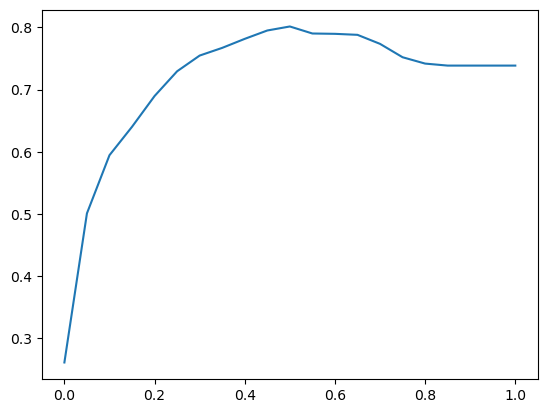

In [126]:
fig, ax = plt.subplots()
ax.plot(thresholds, accuracies)

### Metrics calculation

In [129]:
t = 0.5

predict_churn = (y_pred >= 0.5)
predict_no_churn = (y_pred < 0.5)

actual_churn = (y_val == 1)
actual_no_churn = (y_val == 0)

In [130]:
TP = (predict_churn & actual_churn).sum()
FP = (predict_churn & actual_no_churn).sum()
FN = (predict_no_churn & actual_churn).sum()
TN = (predict_no_churn & actual_no_churn).sum()

In [131]:
confusion_table = np.array(
    [
        [TN, FP],
        [FN, TP]
    ]
)

confusion_table

array([[1202,  172],
       [ 197,  289]])

In [132]:
accuracy = (TP + TN)/(TP + TN + FP + FN)
accuracy

0.8016129032258065

### Precision & Recall


$$Precision = \frac{TP}{TP + FP}$$
$$Recall = \frac{TP}{TP + FN}$$

In [141]:
P = TP / (TP + FP)
round(P, 2)

0.63

In [142]:
R = TP / (TP + FN)
round(R, 2)

0.59

### ROC and AUC score

$$FPR = \frac{FP}{FP + TN}$$
$$TPR = \frac{TP}{TP + FN}$$

In [149]:
FPR = FP/(FP +TN)
TPR = TP/(TP+FN)
print(f"FPR: {round(FPR, 3)}")
print(f"TPR: {round(TPR, 3)}")

FPR: 0.125
TPR: 0.595


##### Plotting FPR vs TPR plot for actual model

In [172]:
def tpr_fpr_dataframe(y_val, y_pred):
    scores = []

    thresholds = np.linspace(0, 1, 101)

    for t in thresholds:
        tp = ((y_pred >= t) & (y_val ==1)).sum()
        fp = ((y_pred >= t) & (y_val ==0)).sum()
        tn = ((y_pred<t) & (y_val == 0)).sum()
        fn = ((y_pred < t) & (y_val ==1)).sum()
        scores.append((t, tp, fp, tn, fn))
    
    df_scores = pd.DataFrame(scores)
    df_scores.columns = ["threshold", "tp", "fp", "tn", "fn"]
    df_scores["fpr"] = df_scores["fp"]/(df_scores["fp"] + df_scores["tn"])
    df_scores["tpr"] = df_scores["tp"]/(df_scores["tp"] + df_scores["fn"])
    return df_scores

df_actual = tpr_fpr_dataframe(y_val, y_pred)
df_actual

,threshold,tp,fp,tn,fn,fpr,tpr
0,0.00,486,1374,0,0,1.000000,1.000000
1,0.01,483,1190,184,3,0.866084,0.993827
2,0.02,481,1074,300,5,0.781659,0.989712
3,0.03,478,1011,363,8,0.735808,0.983539
4,0.04,478,970,404,8,0.705968,0.983539
...,...,...,...,...,...,...,...
96,0.96,0,0,1374,486,0.000000,0.000000
97,0.97,0,0,1374,486,0.000000,0.000000
98,0.98,0,0,1374,486,0.000000,0.000000
99,0.99,0,0,1374,486,0.000000,0.000000


Text(0.5, 0, 'Threshold')

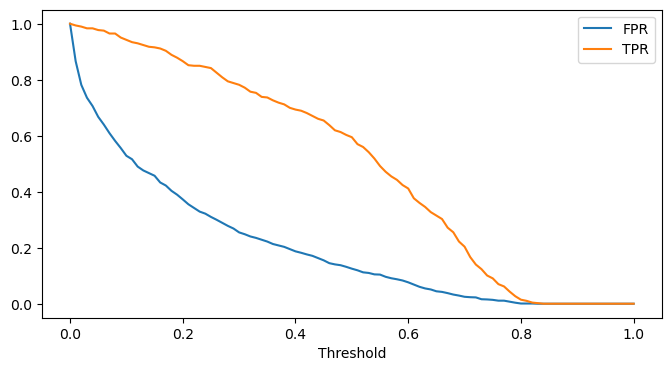

In [173]:
fig, ax = plt.subplots(figsize = (8, 4))

ax.plot(df_actual['threshold'],
        df_actual["fpr"],
        label = "FPR")

ax.plot(df_actual['threshold'],
        df_actual["tpr"],
        label = "TPR")

ax.legend()
ax.set_xlabel("Threshold")

##### Plotting FPR vs TPR plot for random model

Text(0.5, 0, 'Threshold')

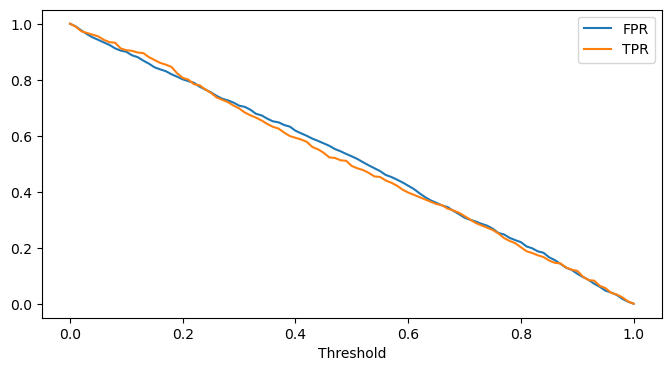

In [174]:
np.random.seed(1)
y_rand = np.random.uniform(0, 1, size=len(y_val))
df_rand = tpr_fpr_dataframe(y_val, y_rand)

fig, ax = plt.subplots(figsize = (8, 4))

ax.plot(df_rand['threshold'],
        df_rand["fpr"],
        label = "FPR")

ax.plot(df_rand['threshold'],
        df_rand["tpr"],
        label = "TPR")

ax.legend()
ax.set_xlabel("Threshold")


##### Plotting FPR vs TPR plot for ideal model

Text(0.5, 0, 'Threshold')

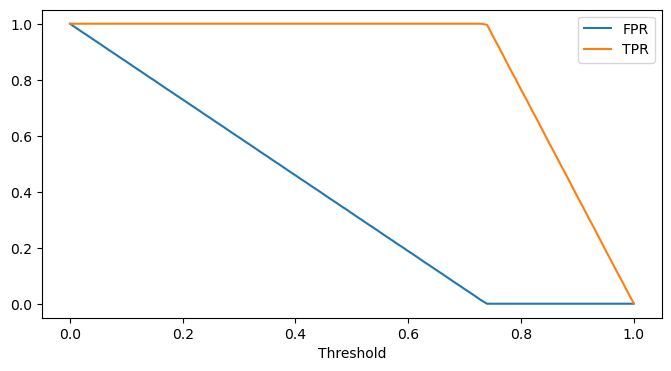

In [175]:
num_neg = (y_val == 0).sum()
num_pos = (y_val == 1).sum()
y_ideal = np.repeat([0, 1], [num_neg, num_pos])
y_pred_ideal = np.linspace(0, 1, num_neg + num_pos)
df_ideal = tpr_fpr_dataframe(y_ideal, y_pred_ideal)

fig, ax = plt.subplots(figsize = (8, 4))

ax.plot(df_ideal['threshold'],
        df_ideal["fpr"],
        label = "FPR")

ax.plot(df_ideal['threshold'],
        df_ideal["tpr"],
        label = "TPR")

ax.legend()
ax.set_xlabel("Threshold")



### ROC Curve

Text(0, 0.5, 'TPR')

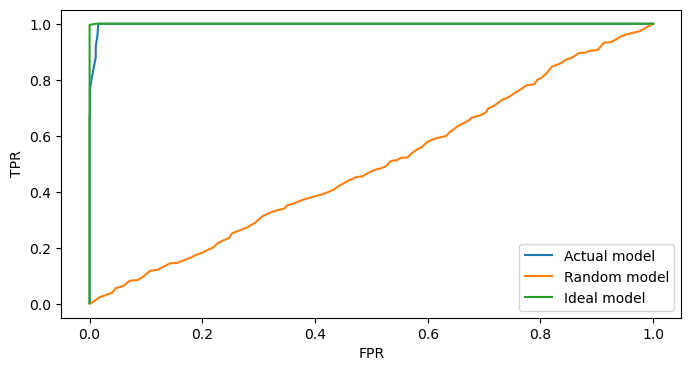

In [176]:
fig, ax = plt.subplots(figsize = (8, 4))

ax.plot(df_actual.fpr,
        df_ideal.tpr,
        label = "Actual model")

ax.plot(df_rand.fpr,
        df_rand.tpr,
        label = "Random model")

ax.plot(df_ideal.fpr,
        df_ideal.tpr,
        label = "Ideal model")

ax.legend()
ax.set_xlabel("FPR")
ax.set_ylabel("TPR")

Text(0.5, 1.0, 'ROC Curve')

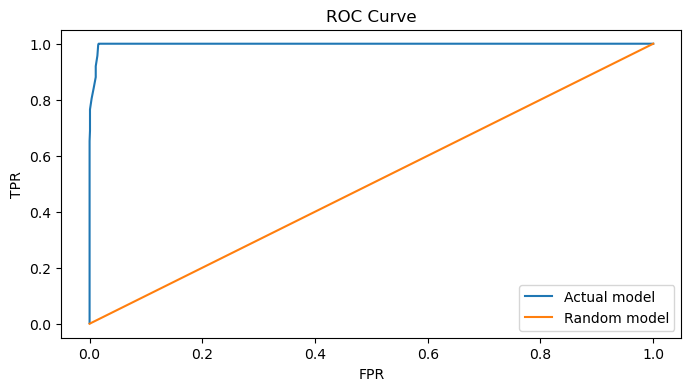

In [177]:
fig, ax = plt.subplots(figsize = (8, 4))

ax.plot(df_actual.fpr,
        df_ideal.tpr,
        label = "Actual model")

ax.plot([0,1],
        [0,1],
        label = "Random model")

ax.legend()
ax.set_xlabel("FPR")
ax.set_ylabel("TPR")
ax.set_title("ROC Curve")

Text(0.5, 1.0, 'ROC Curve')

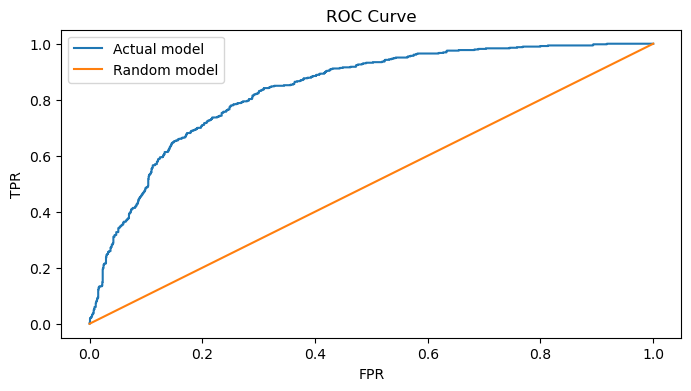

In [178]:
### Using sklearn

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_val, y_pred)

fig, ax = plt.subplots(figsize = (8, 4))

ax.plot(fpr,
        tpr,
        label = "Actual model")

ax.plot([0,1],
        [0,1],
        label = "Random model")

ax.legend()
ax.set_xlabel("FPR")
ax.set_ylabel("TPR")
ax.set_title("ROC Curve")

### Area Under Curve

In [179]:
from sklearn.metrics import auc

auc(df_actual.fpr, df_actual.tpr)

0.8359150837721111

In [182]:
neg = y_pred[y_val == 0]
pos = y_pred[y_val == 1]

np.random.seed(1)
neg_choice = np.random.randint(low = 0,
                               high = len(neg),
                               size = 10000)

pos_choice = np.random.randint(low = 0,
                               high = len(pos),
                               size = 10000)

(pos[pos_choice]>neg[neg_choice]).mean()

0.8356

In [181]:
y_pred==0

array([False, False, False, ..., False, False, False])